In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

### --- compare AP, precision, recall ---

In [2]:
refinedet_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_not_pretrain_20200806/class_df.csv')
refinedet_not_pretrained = refinedet_not_pretrained.drop('Unnamed: 0', axis=1)
refinedet_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_20200806/class_df.csv')
refinedet_pretrained = refinedet_pretrained.drop('Unnamed: 0', axis=1)

In [3]:
ap_df = pd.DataFrame(columns=["AP", "precision", "recall"])
ap_df = ap_df.append(refinedet_not_pretrained, ignore_index=True)
ap_df = ap_df.append(refinedet_pretrained, ignore_index=True)
ap_df.index = ["refinedet_not_pretrained", "refinedet_pretrained"]
ap_df

,AP,precision,recall
refinedet_not_pretrained,0.654160,0.732463,0.720706
refinedet_pretrained,0.763745,0.657283,0.861958


### --- compare accuracy distribution of size ---

In [4]:
det_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_20200806/each_size_df.csv')
det_each_size_df["order"] = det_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(det_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [5]:
refinedet_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_not_pretrain_20200806/all_size_df.csv')
refinedet_not_pretrained = refinedet_not_pretrained.drop('Unnamed: 0', axis=1)
refinedet_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_20200806/all_size_df.csv')
refinedet_pretrained = refinedet_pretrained.drop('Unnamed: 0', axis=1)

In [6]:
insect_size_df["Insect_size"] = refinedet_not_pretrained["Insect_size"]
insect_size_df

,order,count,Insect_size
0,7.0,15,224.800000
1,8.0,181,394.436464
2,9.0,189,726.137566
3,10.0,84,1420.392857
4,11.0,50,2870.260000
5,12.0,38,6288.526316
6,13.0,47,11189.978723
7,14.0,16,22611.437500
8,15.0,3,37326.666667


In [7]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["refinedet_not_pretrained"] = refinedet_not_pretrained["Accuracy"]
all_df["refinedet_pretrained"] = refinedet_pretrained["Accuracy"]
all_df

,order,count,refinedet_not_pretrained,refinedet_pretrained
0,7.0,15,0.666667,0.666667
1,8.0,181,0.817680,0.933702
2,9.0,189,0.708995,0.809524
3,10.0,84,0.559524,0.809524
4,11.0,50,0.660000,0.920000
5,12.0,38,0.710526,0.815789
6,13.0,47,0.787234,0.936170
7,14.0,16,0.687500,0.812500
8,15.0,3,0.666667,1.000000


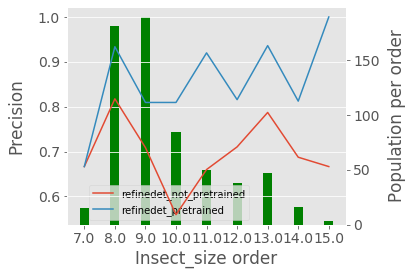

In [8]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["refinedet_not_pretrained"], label="refinedet_not_pretrained")
ax2.plot(x_label, all_df["refinedet_pretrained"], label="refinedet_pretrained")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.67, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_finetuning_20200806/compare_accuracy_per_size.png", bbox_inches="tight")